In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('Placement_data.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [5]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [6]:
# To check the dimensionality of data
df.shape

(215, 15)

In [7]:
# To check the datatypes for each column in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
# To check distribution of data
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
# To check null records
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'SSC percentage')

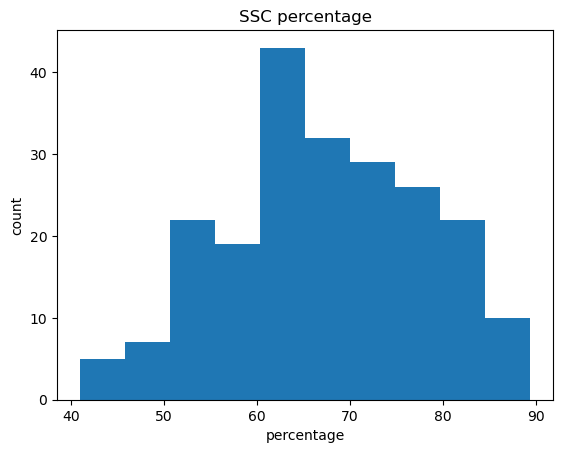

In [12]:
plt.hist(df['ssc_p'])
plt.xlabel('percentage')
plt.ylabel('count')
plt.title('SSC percentage')

(array([84., 39., 17.,  2.,  3.,  0.,  2.,  0.,  0.,  1.]),
 array([200000., 274000., 348000., 422000., 496000., 570000., 644000.,
        718000., 792000., 866000., 940000.]),
 <BarContainer object of 10 artists>)

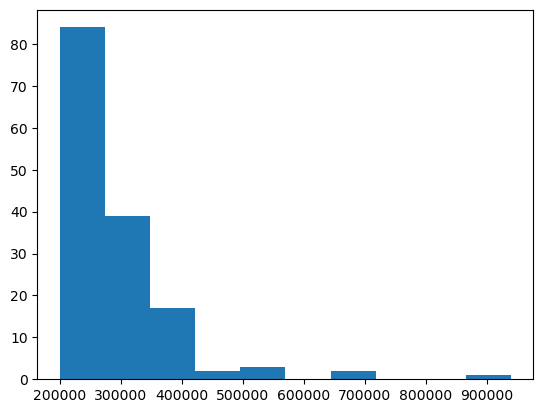

In [13]:
plt.hist(df['salary'])

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

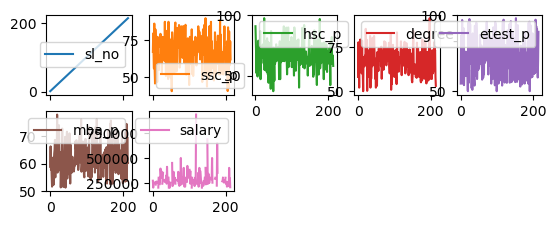

In [14]:
df.plot(subplots=True, layout=(4,5))

(array([139.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  76.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

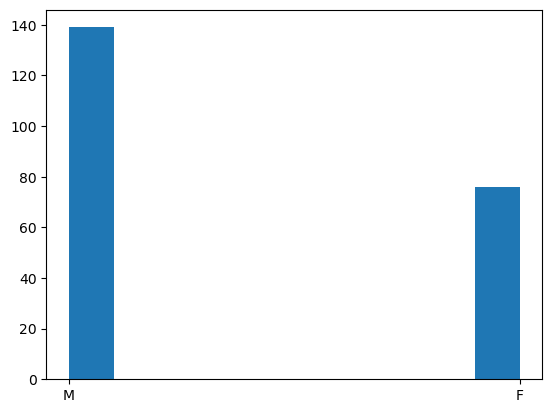

In [15]:
plt.hist(df['gender'])

In [16]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

<Axes: xlabel='ssc_p', ylabel='hsc_p'>

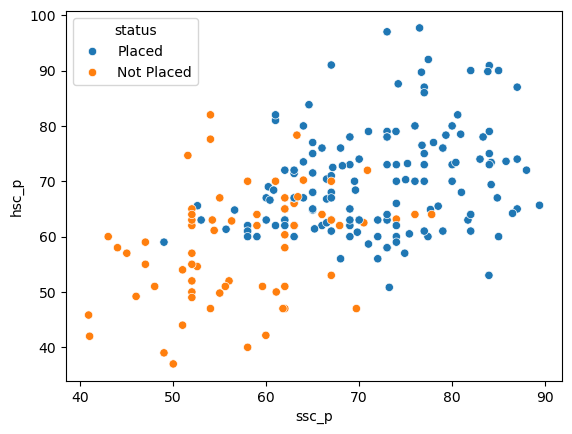

In [17]:
sns.scatterplot(x='ssc_p',y='hsc_p',data=df,hue='status')

In [18]:
# Replacing null values with mean for the salary column
mean=df['salary'].mean()
df['salary']=df['salary'].fillna(mean)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [20]:
df=pd.get_dummies(df,columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],drop_first=True,dtype=int)

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [22]:
df.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR', 'status_Placed'],
      dtype='object')

In [23]:
df=df.drop('sl_no',axis=1)

In [24]:
x=df.drop(['status_Placed'],axis=1)
y=df['status_Placed']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [26]:
models={'lr':LogisticRegression(),
      'rf':RandomForestClassifier(),
      'dt':DecisionTreeClassifier(),
      'gbr':GradientBoostingClassifier(),
       'ab':AdaBoostClassifier(),
       'cb':CatBoostClassifier(),
       'xgb':XGBClassifier(),
       'lgb':LGBMClassifier(),
       'knn':KNeighborsClassifier()
      }

In [27]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    print(f'The {name} is giving the accuracy score{score}')

C:\Users\Divyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The lr is giving the accuracy score0.7746478873239436
The rf is giving the accuracy score0.8591549295774648
The dt is giving the accuracy score0.8169014084507042
The gbr is giving the accuracy score0.9859154929577465
The ab is giving the accuracy score0.9859154929577465
Learning rate set to 0.004504


C:\Users\Divyansh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0:	learn: 0.6884313	total: 138ms	remaining: 2m 18s
1:	learn: 0.6841417	total: 141ms	remaining: 1m 10s
2:	learn: 0.6802679	total: 143ms	remaining: 47.7s
3:	learn: 0.6745160	total: 147ms	remaining: 36.6s
4:	learn: 0.6691175	total: 150ms	remaining: 29.8s
5:	learn: 0.6633290	total: 152ms	remaining: 25.2s
6:	learn: 0.6572518	total: 154ms	remaining: 21.9s
7:	learn: 0.6526358	total: 156ms	remaining: 19.4s
8:	learn: 0.6457565	total: 160ms	remaining: 17.6s
9:	learn: 0.6382821	total: 163ms	remaining: 16.1s
10:	learn: 0.6337946	total: 165ms	remaining: 14.8s
11:	learn: 0.6286985	total: 167ms	remaining: 13.8s
12:	learn: 0.6251106	total: 169ms	remaining: 12.8s
13:	learn: 0.6209655	total: 171ms	remaining: 12.1s
14:	learn: 0.6174584	total: 175ms	remaining: 11.5s
15:	learn: 0.6131164	total: 177ms	remaining: 10.9s
16:	learn: 0.6084722	total: 180ms	remaining: 10.4s
17:	learn: 0.6036249	total: 182ms	remaining: 9.92s
18:	learn: 0.5978057	total: 184ms	remaining: 9.51s
19:	learn: 0.5934323	total: 186ms	remai

217:	learn: 0.1469567	total: 701ms	remaining: 2.52s
218:	learn: 0.1462811	total: 704ms	remaining: 2.51s
219:	learn: 0.1451232	total: 706ms	remaining: 2.5s
220:	learn: 0.1442070	total: 708ms	remaining: 2.5s
221:	learn: 0.1437048	total: 711ms	remaining: 2.49s
222:	learn: 0.1428362	total: 713ms	remaining: 2.48s
223:	learn: 0.1423266	total: 715ms	remaining: 2.48s
224:	learn: 0.1410147	total: 717ms	remaining: 2.47s
225:	learn: 0.1402662	total: 719ms	remaining: 2.46s
226:	learn: 0.1394140	total: 721ms	remaining: 2.46s
227:	learn: 0.1382695	total: 723ms	remaining: 2.45s
228:	learn: 0.1374320	total: 726ms	remaining: 2.44s
229:	learn: 0.1367596	total: 729ms	remaining: 2.44s
230:	learn: 0.1360205	total: 732ms	remaining: 2.44s
231:	learn: 0.1352605	total: 735ms	remaining: 2.43s
232:	learn: 0.1343330	total: 737ms	remaining: 2.42s
233:	learn: 0.1340063	total: 740ms	remaining: 2.42s
234:	learn: 0.1335255	total: 742ms	remaining: 2.42s
235:	learn: 0.1331684	total: 745ms	remaining: 2.41s
236:	learn: 0.

381:	learn: 0.0655700	total: 1.08s	remaining: 1.76s
382:	learn: 0.0651984	total: 1.09s	remaining: 1.75s
383:	learn: 0.0648429	total: 1.09s	remaining: 1.75s
384:	learn: 0.0644848	total: 1.09s	remaining: 1.74s
385:	learn: 0.0640607	total: 1.09s	remaining: 1.74s
386:	learn: 0.0639436	total: 1.1s	remaining: 1.74s
387:	learn: 0.0636390	total: 1.1s	remaining: 1.73s
388:	learn: 0.0632636	total: 1.1s	remaining: 1.73s
389:	learn: 0.0631084	total: 1.1s	remaining: 1.73s
390:	learn: 0.0627605	total: 1.11s	remaining: 1.72s
391:	learn: 0.0625156	total: 1.11s	remaining: 1.72s
392:	learn: 0.0621591	total: 1.11s	remaining: 1.72s
393:	learn: 0.0617962	total: 1.11s	remaining: 1.71s
394:	learn: 0.0615269	total: 1.11s	remaining: 1.71s
395:	learn: 0.0614069	total: 1.12s	remaining: 1.71s
396:	learn: 0.0611092	total: 1.12s	remaining: 1.7s
397:	learn: 0.0608631	total: 1.12s	remaining: 1.7s
398:	learn: 0.0605490	total: 1.13s	remaining: 1.7s
399:	learn: 0.0602542	total: 1.13s	remaining: 1.69s
400:	learn: 0.05999

553:	learn: 0.0351035	total: 1.47s	remaining: 1.19s
554:	learn: 0.0350636	total: 1.48s	remaining: 1.18s
555:	learn: 0.0349976	total: 1.48s	remaining: 1.18s
556:	learn: 0.0349113	total: 1.48s	remaining: 1.18s
557:	learn: 0.0348131	total: 1.48s	remaining: 1.18s
558:	learn: 0.0347217	total: 1.49s	remaining: 1.17s
559:	learn: 0.0346588	total: 1.49s	remaining: 1.17s
560:	learn: 0.0345561	total: 1.49s	remaining: 1.17s
561:	learn: 0.0344955	total: 1.5s	remaining: 1.17s
562:	learn: 0.0343421	total: 1.5s	remaining: 1.16s
563:	learn: 0.0342981	total: 1.5s	remaining: 1.16s
564:	learn: 0.0341616	total: 1.5s	remaining: 1.16s
565:	learn: 0.0340689	total: 1.5s	remaining: 1.15s
566:	learn: 0.0339449	total: 1.51s	remaining: 1.15s
567:	learn: 0.0338689	total: 1.51s	remaining: 1.15s
568:	learn: 0.0337517	total: 1.51s	remaining: 1.15s
569:	learn: 0.0336552	total: 1.52s	remaining: 1.14s
570:	learn: 0.0335994	total: 1.52s	remaining: 1.14s
571:	learn: 0.0335416	total: 1.52s	remaining: 1.14s
572:	learn: 0.033

790:	learn: 0.0196885	total: 2.06s	remaining: 543ms
791:	learn: 0.0196408	total: 2.06s	remaining: 541ms
792:	learn: 0.0196131	total: 2.06s	remaining: 538ms
793:	learn: 0.0195627	total: 2.06s	remaining: 536ms
794:	learn: 0.0195007	total: 2.07s	remaining: 533ms
795:	learn: 0.0194323	total: 2.07s	remaining: 530ms
796:	learn: 0.0193959	total: 2.07s	remaining: 527ms
797:	learn: 0.0193556	total: 2.07s	remaining: 525ms
798:	learn: 0.0192994	total: 2.08s	remaining: 523ms
799:	learn: 0.0192818	total: 2.08s	remaining: 520ms
800:	learn: 0.0192141	total: 2.08s	remaining: 517ms
801:	learn: 0.0191919	total: 2.08s	remaining: 514ms
802:	learn: 0.0191585	total: 2.09s	remaining: 513ms
803:	learn: 0.0191136	total: 2.1s	remaining: 511ms
804:	learn: 0.0190652	total: 2.1s	remaining: 509ms
805:	learn: 0.0190105	total: 2.11s	remaining: 507ms
806:	learn: 0.0189744	total: 2.11s	remaining: 505ms
807:	learn: 0.0189467	total: 2.11s	remaining: 502ms
808:	learn: 0.0189042	total: 2.11s	remaining: 499ms
809:	learn: 0.

961:	learn: 0.0141875	total: 2.45s	remaining: 96.7ms
962:	learn: 0.0141751	total: 2.45s	remaining: 94.2ms
963:	learn: 0.0141603	total: 2.45s	remaining: 91.6ms
964:	learn: 0.0141272	total: 2.46s	remaining: 89.1ms
965:	learn: 0.0140847	total: 2.46s	remaining: 86.5ms
966:	learn: 0.0140560	total: 2.46s	remaining: 83.9ms
967:	learn: 0.0140283	total: 2.46s	remaining: 81.4ms
968:	learn: 0.0139892	total: 2.46s	remaining: 78.8ms
969:	learn: 0.0139741	total: 2.47s	remaining: 76.3ms
970:	learn: 0.0139571	total: 2.47s	remaining: 73.7ms
971:	learn: 0.0139246	total: 2.47s	remaining: 71.2ms
972:	learn: 0.0138988	total: 2.47s	remaining: 68.6ms
973:	learn: 0.0138813	total: 2.48s	remaining: 66.1ms
974:	learn: 0.0138478	total: 2.48s	remaining: 63.5ms
975:	learn: 0.0138162	total: 2.48s	remaining: 61ms
976:	learn: 0.0137889	total: 2.48s	remaining: 58.4ms
977:	learn: 0.0137583	total: 2.48s	remaining: 55.9ms
978:	learn: 0.0137486	total: 2.49s	remaining: 53.3ms
979:	learn: 0.0137412	total: 2.49s	remaining: 50

In [28]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
gbr.predict(x_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

In [29]:
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,275000.000000,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,295000.000000,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,204000.000000,0,1,1,1,0,0,0,0,1,1


In [30]:
import pickle
pickle.dump(gbr,open('model.pkl','wb'))

In [31]:
def prediction_model(ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc,hsc,hsc_s,degree,workex,spec):
    ssc_per=ssc_p
    hsc_per=hsc_p
    degree_per=degree_p
    etest_per=etest_p
    mba_per=mba_p
    sal=salary
    gen=1 if gender=='male' else 0
    ssc=1 if ssc=='others' else 0 
    hsc=1 if hsc=='others' else 0
    hsc_comm=1 if hsc_s=='Commerce' else 0
    hsc_s_Science=1 if hsc_s=='science' else 0
    degree_t_Others=1 if degree=='others' else 0
    degree_t_SciTech=1 if degree=='Sci&Tech' else 0
    workex=1 if workex=='Yes' else 0
    specialisation_MktHR=1 if spec=='Mkt&HR' else 0

    data=np.array([[ssc_per,hsc_per,degree_per,etest_per,mba_per,sal,gen,ssc,hsc,hsc_comm,hsc_s_Science,degree_t_Others,degree_t_SciTech,workex,specialisation_MktHR]]).reshape(1, -1)
    print(data)
    try:
        prediction = model.predict(data)
        if prediction[0]==1:
            status='placed'
        else:
            status='not placed'

        result=f'The candidate would be {status}'
    except Exception as e:
        result = f"An error occurred during prediction: {e}"
    return result

In [32]:
ssc_p=0
hsc_p=0
degree_p=0
etest_p=66.0
mba_p=0
salary=0
gender='male'
ssc='central'
hsc='central'
hsc_s='science'
degree='Sci&Tech'
workex='No'
spec='Mkt&HR'

ans=prediction_model(ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc,hsc,hsc_s,degree,workex,spec)
print(ans)

[[ 0.  0.  0. 66.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.]]
The candidate would be placed


C:\Users\Divyansh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
62.00,58.00,53.00,89.0,60.22,288655.405405,1,0,1,0,1,0,0,0,1

(62.0, 58.0, 53.0, 89.0, 60.22, 288655.405405, 1, 0, 1, 0, 1, 0, 0, 0, 1)

In [34]:
67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,1,0,0,1,0,1

(67.0, 91.0, 58.0, 55.0, 58.8, 270000.0, 1, 1, 1, 1, 0, 0, 1, 0, 1)

In [37]:
# input_data=(67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,1,0,0,1,0,1)
input_data=(62.00,58.00,53.00,89.0,60.22,288655.405405,1,0,1,0,1,0,0,0,1)
np_array=np.asarray(input_data)
reshaped_array=np_array.reshape(1,-1)
# scaler.fit(reshaped_array)
# scaled_array = scaler.transform(reshaped_array) 
prediction=gbr.predict(reshaped_array)
print(prediction[0])

0


C:\Users\Divyansh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
